In [1]:
import importlib

import matplotlib.pyplot as plt
import numpy as np

import tike.ptycho
import tike.view

In [2]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.7.1.dev4+g416b6c4.d20191028
numpy is version 1.17.3


# Create test data

Make a test data for pytchography reconstruction at one projection angle.

### Define the object

Normalize input uint8 images to the `[0, 1]` and `[0, pi]` ranges.

In [3]:
amplitude = plt.imread("../tests/data/Cryptomeria_japonica-0128.tif") / 255
phase = plt.imread("../tests/data/Bombus_terrestris-0128.tif") / 255 * np.pi
np.min(phase), np.max(phase)

(0.036959913571644624, 3.129272682399245)

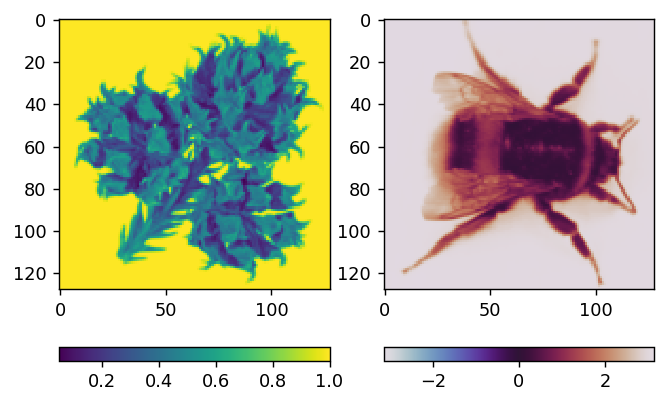

(128, 128)

(-0.9999241101148306+0.012319659535238529j) (0.9951469164070644+0.0984002782796427j)


In [4]:
original = amplitude * np.exp(1j * phase)
tike.view.plot_phase(original)
original.shape

### Define the probe

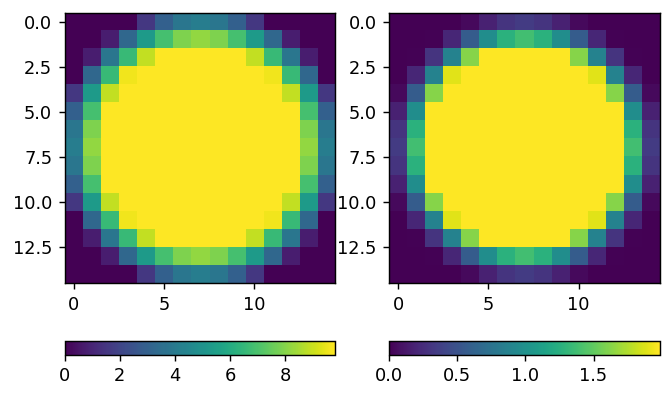

In [18]:
pw = 15 # probe width
weights = tike.ptycho.gaussian(pw, rin=0.8, rout=1.0)
probe = weights * np.exp(1j * weights * 0.2) * 10
tike.view.plot_complex(probe)

### Define the trajectory

In [19]:
v, h = np.meshgrid(
    np.linspace(0, amplitude.shape[0]-pw, 24, endpoint=True),
    np.linspace(0, amplitude.shape[0]-pw, 24, endpoint=True),
    indexing='ij'
    )
print(v.shape, h.size)

(24, 24) 576


## Simulate data acquisition

In [20]:
# Then what we see at the detector is the wave propagation
# of the near field wavefront
data = tike.ptycho.simulate(data_shape=np.ones(2, dtype=int)*pw*3,
                            probe=probe, v=v, h=h,
                            psi=original)
data = np.random.poisson(data)
data.shape

(576, 45, 45)

/home/dching/miniconda3/envs/tike/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


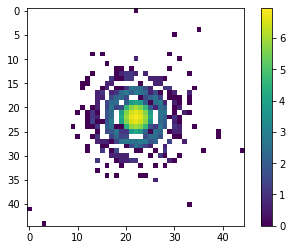

(0, 1136)

In [21]:
plt.imshow(np.fft.fftshift(np.log(data[11])))
plt.colorbar()
plt.show()
np.min(data), np.max(data)

# Reconstruct

Now we need to try and reconstruct psi.

In [24]:
# Start with a guess of all zeros for psi
new_psi = np.ones(original.shape, dtype=complex)

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.3360180e+07


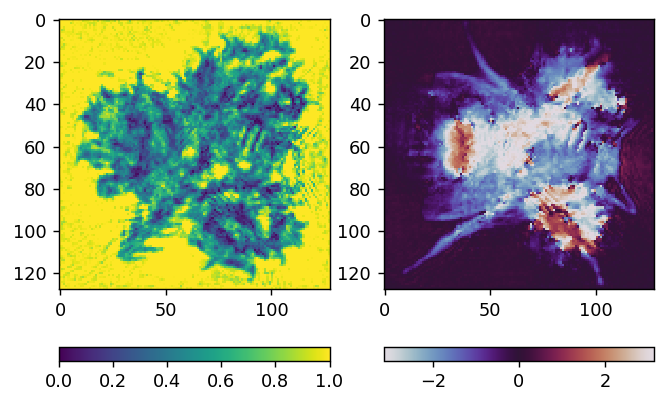

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.2013137-0.19487779j) (1.4240044-0.20201191j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.5738552e+07


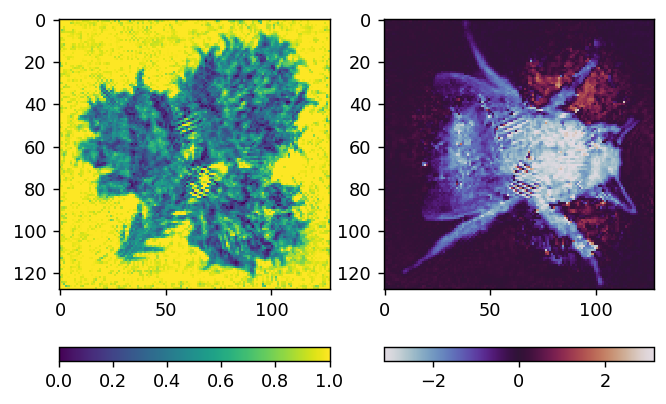

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.3057971-0.30149162j) (1.3897492-0.1134706j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.5947115e+07


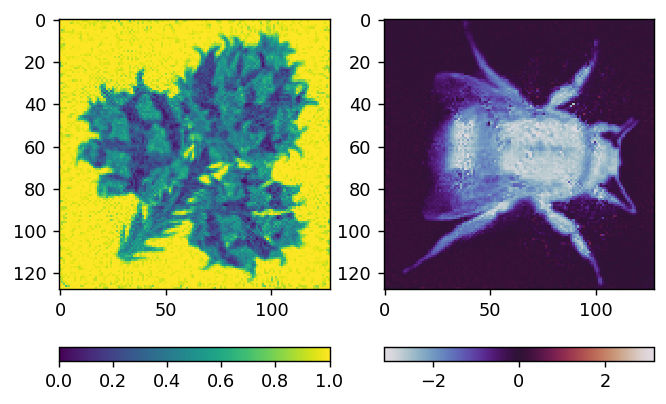

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-0.9730335-0.4824166j) (1.3740044+0.13415782j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.6054976e+07


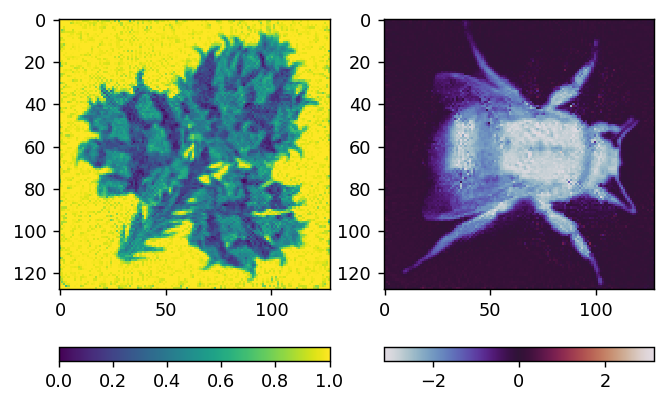

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.015073-0.28496295j) (1.3828155+0.16856086j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.6057562e+07


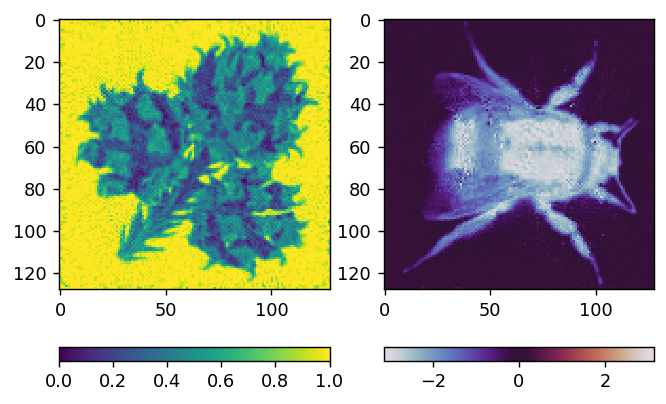

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.0131484-0.24269511j) (1.3914624+0.20125878j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.6057798e+07


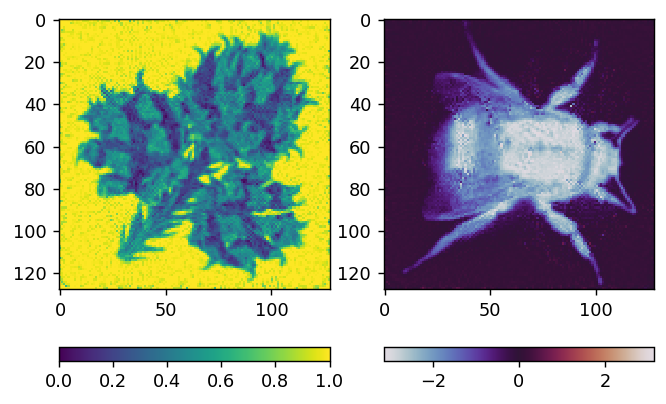

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.0182811-0.21667734j) (1.4110591-0.18690285j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 1.250e-01, 0.000e+00, -1.6057856e+07


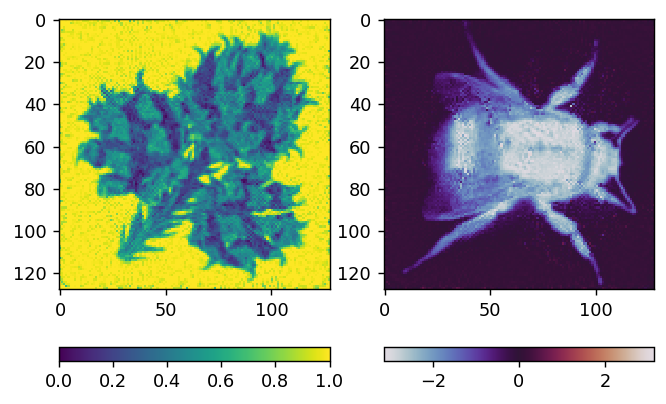

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.0108815-0.23376065j) (1.4515276-0.18070786j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.6057888e+07


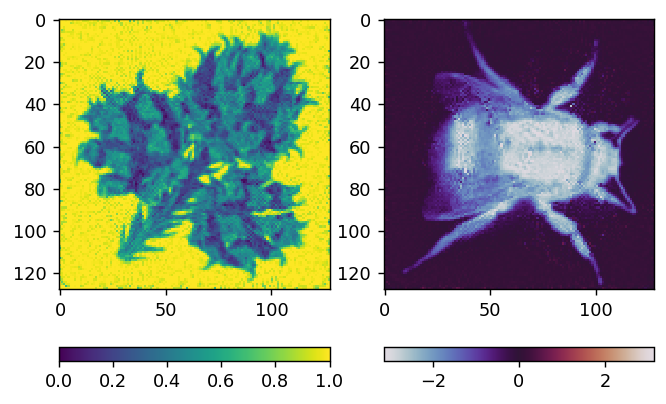

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.0108135-0.34561273j) (1.4827597-0.18156442j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.6057909e+07


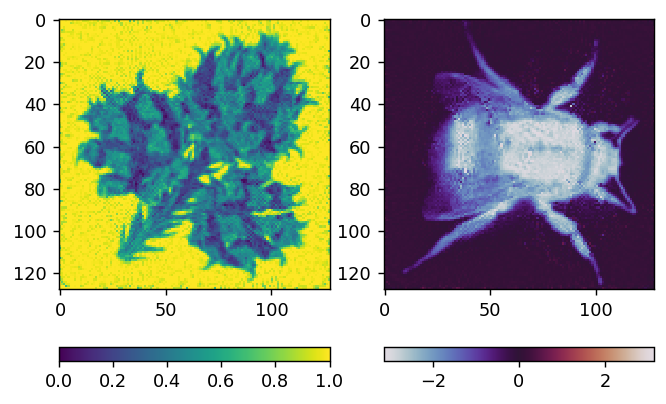

INFO:tike.ptycho.ptycho:cgrad on 576 - 45 by 45 grids for 8 iterations


(-1.003626-0.3430125j) (1.4997396-0.18254115j)
# congujate gradient parameters
iteration, step size object, step size probe, function min
   0, 2.500e-01, 0.000e+00, -1.6057923e+07


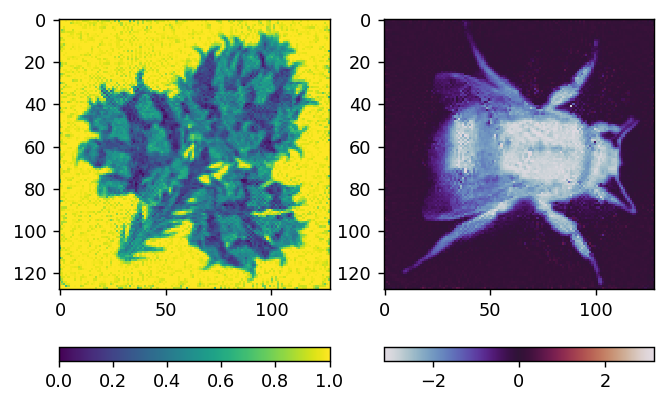

(-1.0014349-0.34394026j) (1.5192673-0.1854406j)


In [25]:
for i in range(10):
    new_psi = tike.ptycho.reconstruct(data=data,
                                      probe=probe, v=v, h=h,
                                      psi=new_psi,
                                      algorithm='cgrad',
                                      num_iter=8, gamma_psi=1)
    tike.view.plot_phase(new_psi, amin=0, amax=1)